In [403]:
import pandas as pd
from matplotlib import pyplot as plt

gdp_data = pd.read_csv('GDP_Per_Capita.csv', skiprows = 4, index_col=1)
gdp_metadata = pd.read_csv('Metadata_Country_API_GDP_Per_Capita.csv', index_col=0)
gdp_metadata.drop(gdp_metadata.filter(regex="Unnamed"),axis=1, inplace=True)
gdp_data.drop(gdp_data.filter(regex="Unnamed"),axis=1, inplace=True)

In [404]:
ufc_data = pd.read_csv('Underweight_Children_Data.csv', skiprows = 4, index_col=1)
ufc_metadata = pd.read_csv('Metadata_Country_API_Underweight_Children_Data.csv', index_col=0)
ufc_data.drop(ufc_data.filter(regex="Unnamed"),axis=1, inplace=True)
ufc_metadata.drop(ufc_metadata.filter(regex="Unnamed"),axis=1, inplace=True)

In [405]:
gdp_df = pd.merge(gdp_metadata,gdp_data,on='Country Code')
ufc_df = pd.merge(ufc_metadata,ufc_data,on='Country Code')

In [406]:
gdp_df_trim = gdp_df.drop(["Region","IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)
ufc_df_trim = ufc_df.drop(["Region","IncomeGroup","TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)

In [419]:
gdp_melt = gdp_df_trim.melt(ignore_index=False,var_name="Year",value_name="GDP")
ufc_melt = ufc_df_trim.melt(ignore_index=False,var_name="Year",value_name="MalnutritionData")

In [455]:
gdp_melt

,Year,GDP
Country Code,,
ABW,1960,NaN
AFE,1960,161.638982
AFG,1960,62.369375
AFW,1960,107.423775
AGO,1960,NaN
...,...,...
XKX,2022,5351.439542
YEM,2022,676.928385
ZAF,2022,6776.480077


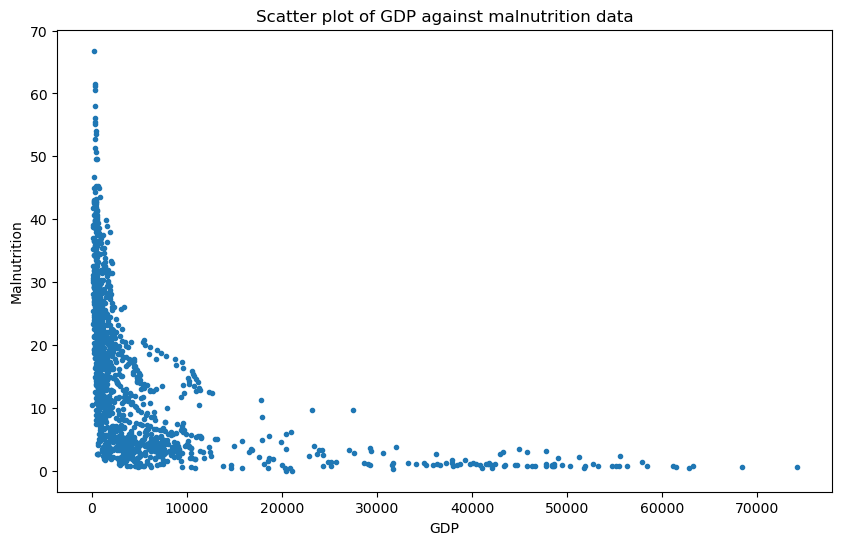

In [420]:
plt.figure(figsize=(10,6))
plt.title("Scatter plot of GDP against malnutrition data")
plt.xlabel("GDP")
plt.ylabel("Malnutrition")
plt.scatter(gdp_melt['GDP'],ufc_melt['MalnutritionData'], marker='.')
plt.show()

In [409]:
country_gdp = gdp_df.drop(gdp_df[gdp_df["Region"]=='North America'].index)
country_ufc = ufc_df.drop(ufc_df[ufc_df["Region"]=='North America'].index)

In [433]:
country_gdp_trim = country_gdp.drop(["TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)
country_ufc_trim = country_ufc.drop(["TableName","Country Name","Indicator Name","Indicator Code","SpecialNotes"], axis=1)

In [503]:
country_gdp_trim_melt = country_gdp_trim.melt(ignore_index=False,id_vars=["Region","IncomeGroup"],var_name="Year",value_name="GDP")
country_ufc_trim_melt = country_ufc_trim.melt(ignore_index=False,id_vars=["Region","IncomeGroup"],var_name="Year",value_name="MalnutritionData")

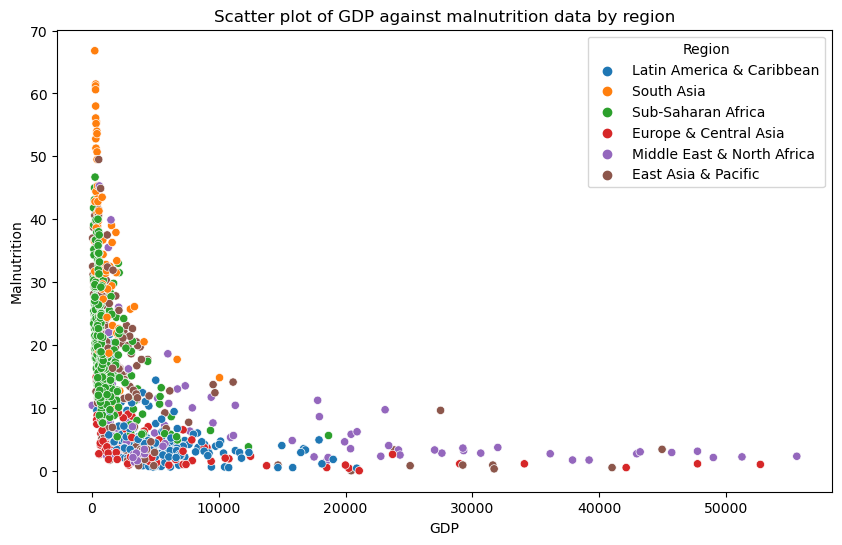

In [509]:
plt.figure(figsize=(10,6))
plt.title("Scatter plot of GDP against malnutrition data by region")
plt.xlabel("GDP")
plt.ylabel("Malnutrition")
sns.scatterplot(x=country_gdp_trim_melt['GDP'],y=country_ufc_trim_melt['MalnutritionData'], markers='.', hue=country_gdp_trim_melt['Region'])
plt.show()

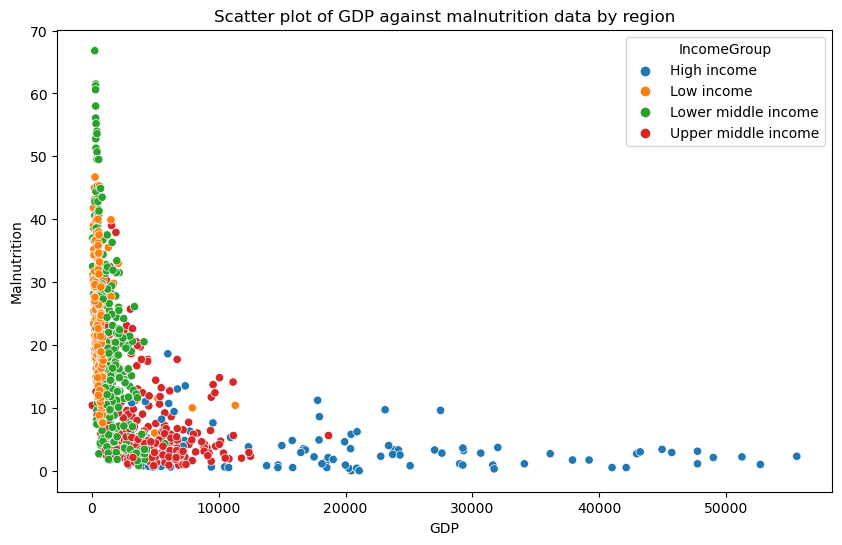

In [511]:
plt.figure(figsize=(10,6))
plt.title("Scatter plot of GDP against malnutrition data by region")
plt.xlabel("GDP")
plt.ylabel("Malnutrition")
sns.scatterplot(x=country_gdp_trim_melt['GDP'],y=country_ufc_trim_melt['MalnutritionData'], markers='.', hue=country_gdp_trim_melt['IncomeGroup'])
plt.show()